## 1. What is BioPhython?
The Biopython Project is an international association of developers of freely available Python tools for computational molecular biology.

## 2. What is DNA? 
DNA stands for deoxyribonucleic acid. It's the genetic code that determines all the characteristics of a living thing. Each nucleotide contains a sugar and a phosphate molecule, which make up the 'backbone' of DNA, and, one of four organic bases. The bases are adenine(A), guanine(G), cytosine(C) and thymine(T)

In [24]:
import numpy as np
import pandas as pd 
import os 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import Bio
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio import SeqIO
from Bio import AlignIO
from Bio.pairwise2 import format_alignment 
from Bio.Align import MultipleSeqAlignment
from Bio.Blast import NCBIWWW
from Bio.SeqUtils.ProtParam import ProteinAnalysis
from Bio.Data import CodonTable
from Bio.SeqUtils import GC
import nglview as nv
from colorama import Back, Style, Fore

In [10]:
for record in SeqIO.parse('./data/sequence.fasta', 'fasta'):
  print(record)

ID: MW463452.1
Name: MW463452.1
Description: MW463452.1 Severe acute respiratory syndrome coronavirus 2 isolate SARS-CoV-2/human/TUN/TUN-20212285/2021, complete genome
Number of features: 0
Seq('TCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAAC...AGG')


In [11]:
## Loading the FASTA file: COVID-19 genome 
ncov_record = SeqIO.read('./data/sequence.fasta', 'fasta')
ncov_record

SeqRecord(seq=Seq('TCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAAC...AGG'), id='MW463452.1', name='MW463452.1', description='MW463452.1 Severe acute respiratory syndrome coronavirus 2 isolate SARS-CoV-2/human/TUN/TUN-20212285/2021, complete genome', dbxrefs=[])

In [13]:
ncov_dna = ncov_record.seq
ncov_dna

Seq('TCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAAC...AGG')

In [15]:
## Visualizing the Nucleotides of the Covid19 DNA
def ten_nucleotide_seq(genome):
    genes = []
    for ix, char in enumerate(genome):
        if ix != 0 and ix%10 == 0:
            genes.append(' ')
        genes.append(char)
    return ''.join(genes)

# color code to represent genome sequences
nu_clr_switcher = {
    # standard color-codes
    'A': Back.GREEN,
    'C': Back.YELLOW,
    'G': Back.RED,
    'T': Back.BLUE,
    ' ': Style.RESET_ALL
}
protein_clr_switcher = {
    # color-code by proteinfamily's polarity
    'A': Back.BLUE,
    'V': Back.BLUE,
    'I': Back.BLUE,
    'L': Back.BLUE,
    'M': Back.BLUE,
    'F': Back.BLUE,
    'Y': Back.CYAN,
    'W': Back.BLUE,
    'H': Back.CYAN,
    'R': Back.RED,
    'K': Back.RED,
    'N': Back.GREEN,
    'Q': Back.GREEN,
    'E': Back.MAGENTA,
    'D': Back.MAGENTA,
    'S': Back.GREEN,
    'T': Back.GREEN,
    'G': Back.YELLOW,
    'P': Back.YELLOW,
    'C': Back.BLUE,
    ' ': Style.RESET_ALL
}
def seq_repr(genome_str, strand ='dna'):
    if strand == 'dna':
        genome_str = ten_nucleotide_seq(genome=genome_str)
        line_break_cntr = 0
        for i in range(len(genome_str)):
            if genome_str[i] == ' ':
                line_break_cntr += 1
                if line_break_cntr>0 and line_break_cntr%6==0:
                    text = "\n"
                else:
                    text = nu_clr_switcher[genome_str[i]] + genome_str[i]
            else:
                text = nu_clr_switcher[genome_str[i]] + genome_str[i]
            print(text, end="")
        Style.RESET_ALL
    if strand == 'protein':
        for i in range(len(genome_str)):
            if genome_str[i] in protein_clr_switcher:
                if genome_str[i] == 'S' and genome_str[i+1:i+4] == 'TOP':
                    text = Style.RESET_ALL + 'S'
                elif genome_str[i] == 'T' and genome_str[i-1] == 'S' and genome_str[i+1:i+3] == 'OP':
                    text = Style.RESET_ALL + 'T'
                elif genome_str[i] == 'P' and genome_str[i-3:i] == 'STO':
                    text = Style.RESET_ALL + 'P'
                else:
                    text = protein_clr_switcher[genome_str[i]] + genome_str[i]
            else:
                Style.RESET_ALL
                text = genome_str[i]
            print(text, end="")

In [17]:
print("COVID-19 genome: ")
seq_repr(ncov_dna[:300])

COVID-19 genome: 
TCCCAGGTAA CAAACCAACC AACTTTCGAT CTCTTGTAGA TCTGTTCTCT AAACGAACTT
TAAAATCTGT GTGGCTGTCA CTCGGCTGCA TGCTTAGTGC ACTCACGCAG TATAATTAAT
AACTAATTAC TGTCGTTGAC AGGACACGAG TAACTCGTCT ATCTTCTGCA GGCTGCTTAC
GGTTTCGTCC GTGTTGCAGC CGATCATCAG CACATCTAGG TTTTGTCCGG GTGTGACCGA
AAGGTAAGAT GGAGAGCCTT GTCCCTGGTT TCAACGAGAA AACACACGTC CAACTCAGTT

In [19]:
print("Total number of nucleotides: ")
print(len(ncov_dna))

Total number of nucleotides: 
29845


## 3. Finding the Composition of each Nucleotide

In [20]:
def nucleotides_composition(seq):
  nucleotides = {'A': 0, 'C': 0, 'G': 0, 'T': 0}
  for n in nucleotides:
    nucleotides[n] = seq.count(n)/len(seq)*100
  return nucleotides 

In [21]:
ndict = nucleotides_composition(ncov_dna)
ndict

{'A': 29.81738984754565,
 'C': 18.36153459540962,
 'G': 19.604623890098843,
 'T': 32.125984251968504}

In [22]:
ndf = pd.DataFrame.from_dict(ndict, orient='index')
ndf = ndf.reset_index()
ndf = ndf.rename(columns={'index': 'Nucleotide', 0: 'Composition'})
ndf

,Nucleotide,Composition
0,A,29.817390
1,C,18.361535
2,G,19.604624
3,T,32.125984


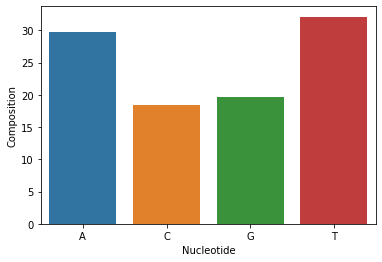

In [23]:
ax = sns.barplot(x="Nucleotide", y="Composition", data=ndf)

## 4. Calculating GC-content of the DNA
In polymerase chain reaction (PCR) experiments, the GC-content of short oligonucleotides known as primers is often used to predict their annealing temperature to the template DNA. A higher GC-content level indicates a relatively higher melting temperature which correlates to higher stability.

In [25]:
print(f"GC% :{GC(ncov_dna)}")

GC% :37.96615848550846


## 5. Tri-nucleotide compositions (Tri-mer)
In bioinformatics, k-mers are subsequences of length k contained within a biological sequence. Primarily used within the context of computational genomics and sequence analysis, in which k-mers are composed of nucleotides (i.e. A, T, G, and C), k-mers are capitalized upon to assemble DNA sequences, improve heterologous gene expression, identify species in metagenomic samples, and create attenuated vaccines. 

In [26]:
# tri-nucleotide compositions
trimers = ["AAA", "AAC", "AAG", "AAT", "ACA", "ACC", "ACG", "ACT", "AGA", "AGC", "AGG", "ATA", "ATC", "ATG", "CAA", 
           "CAC", "CAG", "CCA","CCC","CCG","CGA","CGC","CTA","CTC","GAA","GAC","GCA","GCC","GGA","GTA","TAA","TCA"]

In [27]:
def trimer_composition(genome):
  trimer_dict = dict()
  for trimer in trimers:
    trimer_dict[trimer] = genome.count(trimer)
  return trimer_dict 

In [28]:
composition = trimer_composition(ncov_dna)
total_composition = sum(composition.values())
norm_freq = [count/total_composition for count in composition.values()]
print(composition)
print(total_composition)
print(norm_freq)

{'AAA': 641, 'AAC': 615, 'AAG': 575, 'AAT': 760, 'ACA': 754, 'ACC': 371, 'ACG': 164, 'ACT': 674, 'AGA': 567, 'AGC': 300, 'AGG': 328, 'ATA': 446, 'ATC': 339, 'ATG': 722, 'CAA': 702, 'CAC': 427, 'CAG': 437, 'CCA': 353, 'CCC': 102, 'CCG': 73, 'CGA': 95, 'CGC': 94, 'CTA': 555, 'CTC': 270, 'GAA': 531, 'GAC': 338, 'GCA': 371, 'GCC': 188, 'GGA': 280, 'GTA': 468, 'TAA': 717, 'TCA': 550}
13807
[0.046425726080973416, 0.04454262330701818, 0.04164554211631781, 0.05504454262330702, 0.054609980444701965, 0.026870428043745925, 0.011878032881871515, 0.04881581806330122, 0.041066125878177734, 0.02172810893025277, 0.02375606576374303, 0.032302455276309115, 0.02455276309118563, 0.05229231549214167, 0.05084377489679148, 0.030926341710726443, 0.03165061200840154, 0.02556674150793076, 0.007387557036285942, 0.005287173173028174, 0.006880567827913377, 0.006808140798145868, 0.040197001520967626, 0.019555298037227494, 0.038458752806547404, 0.024480336061418122, 0.026870428043745925, 0.013616281596291736, 0.0202

In [29]:
tri = pd.DataFrame.from_dict(composition, orient='index')
tri = tri.reset_index()
tri = tri.rename(columns={"index": "trimer", 0: "count"})

In [30]:
r1 = tri.sort_values(by='count', ascending=False)
r1.style.bar(subset=["count"], color='#').background_gradient(cmap='Reds')

,trimer,count
3,AAT,760
4,ACA,754
13,ATG,722
30,TAA,717
14,CAA,702
7,ACT,674
0,AAA,641
1,AAC,615
2,AAG,575
8,AGA,567


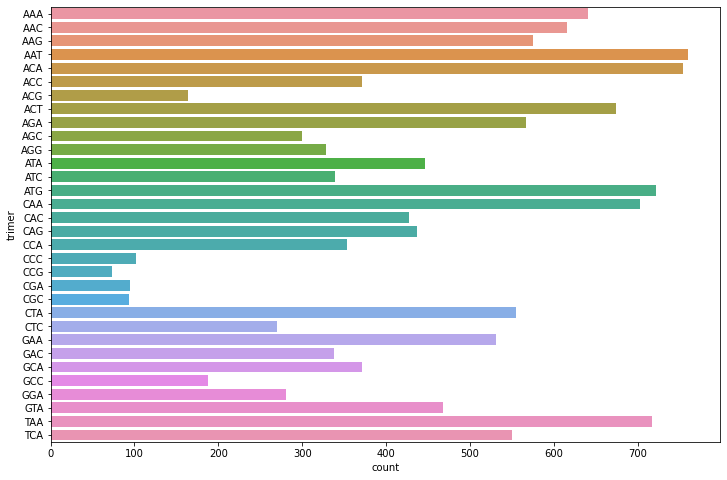

In [32]:
fig_dims = (12, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x="count", y="trimer", ax=ax, data=tri)